In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [5]:
mnist =  tf.keras.datasets.mnist

In [6]:
(x_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 13s 1us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
print (X_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
x_train = x_train/255
X_test = X_test/255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
IMG_SIZE=28
x_trainr= np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr= np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [15]:
model = Sequential()

#1st layer
model.add(Conv2D(64, (3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layer #2
model.add(Dense(32))
model.add(Activation("relu"))

#last fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics='accuracy')

In [18]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2519 - accuracy: 0.9200 - val_loss: 0.1071 - val_accuracy: 0.9684
Epoch 2/25
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0840 - accuracy: 0.9742 - val_loss: 0.0699 - val_accuracy: 0.9800
Epoch 3/25
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0610 - accuracy: 0.9809 - val_loss: 0.0603 - val_accuracy: 0.9824
Epoch 4/25
1500/1500 [==============================] - 41s 27ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0556 - val_accuracy: 0.9834
Epoch 5/25
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0544 - val_accuracy: 0.9836
Epoch 6/25
1500/1500 [==============================] - 39s 26ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0597 - val_accuracy: 0.9829
Epoch 7/25
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0642 -

In [19]:
model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


array([[9.8441214e-19, 1.3931598e-09, 3.3234963e-11, ..., 9.9999976e-01,
        5.2704258e-11, 8.4217545e-13],
       [3.1462795e-16, 3.3403657e-17, 1.0000000e+00, ..., 3.3008312e-14,
        2.5668107e-13, 2.7393945e-10],
       [6.5431779e-12, 9.9999964e-01, 1.2056447e-09, ..., 3.4399379e-09,
        1.5074750e-08, 2.3302311e-12],
       ...,
       [5.6612122e-24, 1.7635632e-24, 4.1952282e-24, ..., 1.3560670e-22,
        9.7228440e-24, 2.3258557e-18],
       [8.7399962e-11, 1.9840188e-13, 5.2704402e-10, ..., 2.1569135e-12,
        9.2740138e-12, 2.8590532e-09],
       [1.2144967e-12, 1.8359238e-15, 1.0980303e-10, ..., 1.4864595e-14,
        1.3384950e-15, 9.5448789e-14]], dtype=float32)

In [20]:
y_prob =model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [21]:
y_pred = y_prob.argmax(axis=1)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9804

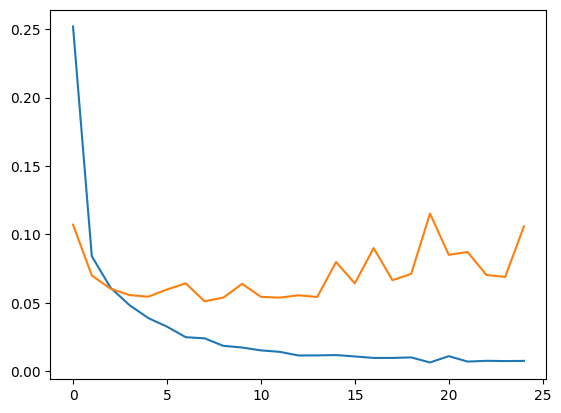

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

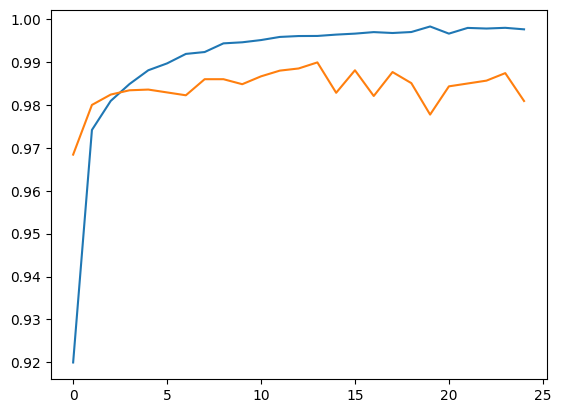

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [26]:
import cv2

In [28]:
img = cv2.imread("C:/Users/Aayush/OneDrive/Desktop/HDR/fine2.jpg")

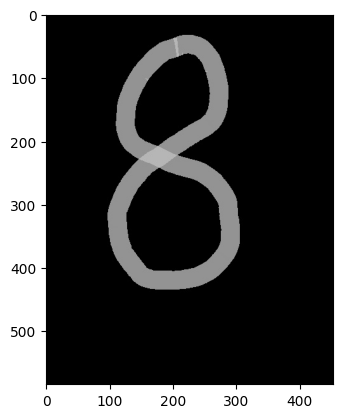

In [29]:
plt.imshow(img)

In [30]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [31]:
gray.shape

(584, 453)

In [32]:
img.shape

(584, 453, 3)

In [33]:
gray = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [34]:
newimg = tf.keras.utils.normalize(gray,axis =1)

In [35]:
IMG_SIZE=28

In [36]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [37]:
newimg.shape

(1, 28, 28, 1)

In [38]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 79ms/step


In [39]:
print (np.argmax(predictions))

8
